## 주택가격 


-  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# 1. 데이터 확인하기

In [1]:
import pandas as pd

### 훈련 데이터

In [2]:
path = '../houseprices_advanced/train.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 테스트 데이터

- 테스트 데이터와 타켓 

In [5]:
path2 = '../houseprices_advanced/test.csv'

In [6]:
path3 = '../houseprices_advanced/sample_submission.csv'

In [7]:
test = pd.read_csv(path2)

In [8]:
y_test = pd.read_csv(path3)

## 범주형 데이터 추출 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
cat_f = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']

In [11]:
len(cat_f)

37

# 2. 회귀모델 머신러닝 확인하기 

## AutoML 버전확인 

In [12]:
import pycaret

In [13]:
pycaret.__version__

'3.0.0'

## 회귀 모델 처리하기 

In [14]:
from pycaret.regression import *

## 데이터 세팅하기 

- target = 'SalePrice' : 정답
- categorical_features = cat_f : 범주형 데이터만 추출  
- ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'] : 제거 
- normalize = True
- session_id = 123

In [15]:
exp_reg101 = setup(data = df, target = 'SalePrice', categorical_features = cat_f,
                   ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
                   normalize = True,session_id = 123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 263)"
5,Transformed train set shape,"(1021, 263)"
6,Transformed test set shape,"(439, 263)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,37


## 현재 제공하는 회귀 모델 확인하기 

In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 여러 모델 성능 비교하기 

In [17]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15620.2833,834265771.3367,27789.4853,0.8783,0.1292,0.0901,0.4180
gbr,Gradient Boosting Regressor,17242.5199,856798302.8345,28402.9232,0.8718,0.1375,0.0998,0.3780
lightgbm,Light Gradient Boosting Machine,17683.7076,1007854246.5697,30819.4442,0.8502,0.1455,0.1025,0.4410
xgboost,Extreme Gradient Boosting,18601.9995,1119037035.9888,31335.9088,0.8417,0.1516,0.1088,0.4150
rf,Random Forest Regressor,19022.1086,1110134015.6217,32354.6791,0.8355,0.1543,0.1113,0.3750
et,Extra Trees Regressor,19119.8387,1186449454.6075,33148.2505,0.8289,0.1531,0.1111,0.3980
en,Elastic Net,18341.4667,1274193888.8387,33702.1803,0.8102,0.1495,0.1051,0.3760
ada,AdaBoost Regressor,25675.4247,1384653021.3860,36567.5742,0.7930,0.2054,0.1677,0.3890
par,Passive Aggressive Regressor,17961.5193,1393334324.9563,34570.7230,0.7877,0.1897,0.1069,0.3620
llar,Lasso Least Angle Regression,18451.1457,1440719503.1413,34837.8055,0.7794,0.1964,0.1118,0.4160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 3. 단일 모델 확인하기 

# Creating the model

In [18]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20917.6690,2128068875.9588,46130.9969,0.7401,0.1832,0.1182
1,17464.0822,757633344.8999,27525.1402,0.8818,0.1281,0.0928
2,15455.9590,470020727.8455,21679.9614,0.8982,0.1269,0.0961
3,15579.9656,597743226.3357,24448.7878,0.8848,0.1271,0.0921
4,19229.6347,1101363525.5540,33186.7975,0.8880,0.1721,0.1221
5,15421.2352,716669387.4306,26770.6815,0.9007,0.1267,0.0907
6,18219.9704,706507189.8479,26580.2030,0.8501,0.1224,0.0988
7,15631.6694,543281285.4920,23308.3952,0.9203,0.1277,0.0937
8,19605.4028,1088458076.1607,32991.7880,0.8376,0.1548,0.1127


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 모델 튜닝

In [19]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22430.1919,2066137025.3392,45454.7800,0.7476,0.1985,0.1306
1,17058.7840,710142209.2129,26648.4936,0.8892,0.1281,0.0912
2,16602.8236,581676511.0349,24117.9707,0.8741,0.1415,0.1041
3,16642.1493,617523619.2323,24850.0225,0.8810,0.1328,0.0984
4,20836.1742,1531598030.0311,39135.6363,0.8442,0.1732,0.1242
5,17595.3516,774651170.9311,27832.5560,0.8927,0.1471,0.1043
6,22024.3518,1236803281.1709,35168.2141,0.7376,0.1481,0.1133
7,16327.1751,542272736.4774,23286.7502,0.9204,0.1204,0.0927
8,19654.8772,1697516642.5628,41200.9301,0.7467,0.1674,0.1155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
tuned_gbr

GradientBoostingRegressor(random_state=123)

### 튜닝모델에 대한 그래프 확인하기 

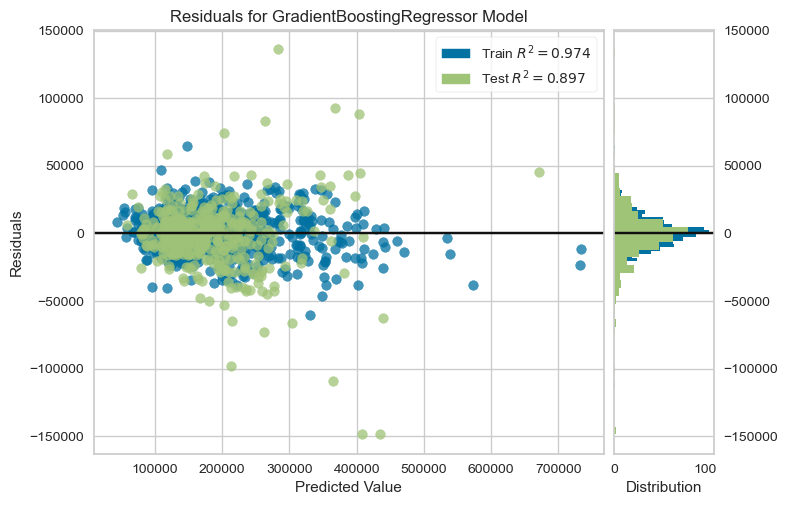

In [21]:
plot_model(tuned_gbr)

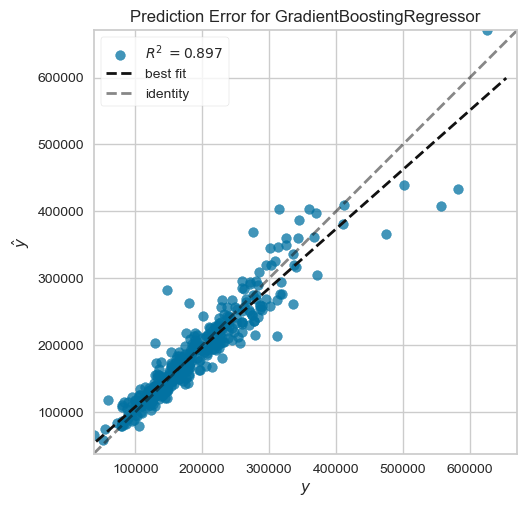

In [22]:
plot_model(tuned_gbr, plot = 'error')

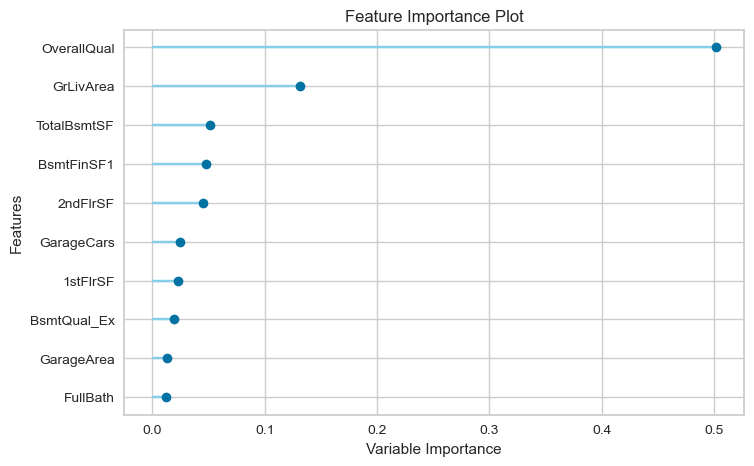

In [23]:
plot_model(tuned_gbr, plot = 'feature')

## 평가모델 확인하기 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

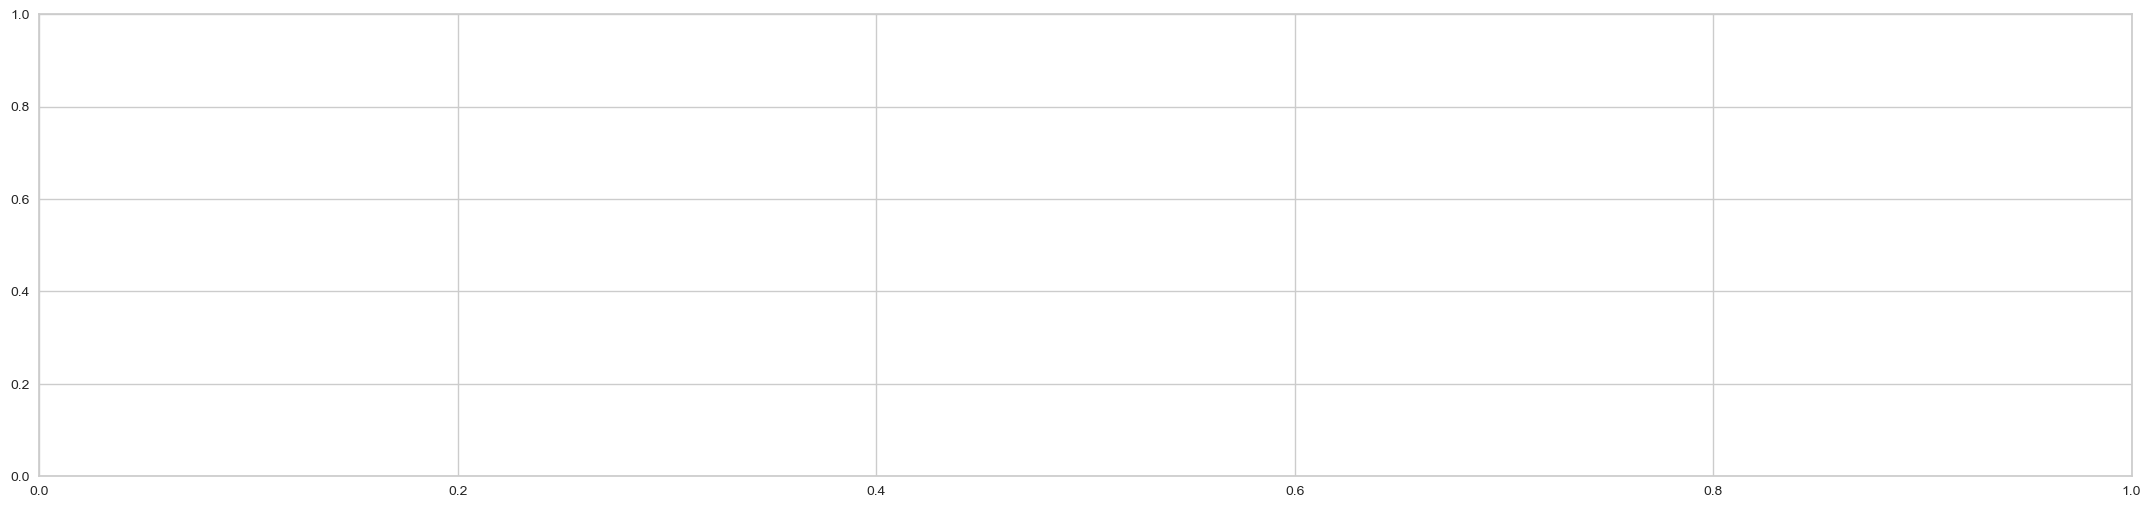

In [24]:
evaluate_model(tuned_gbr)

## 예측하기 

In [25]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15346.8587,589399673.6666,24277.5549,0.8971,0.1173,0.0839


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
147,148,60,RL,NaN,9505,Pave,IR1,Lvl,CulDSac,Gtl,...,0,0,0,0,5,2010,WD,Normal,222500,222602.144163
676,677,70,RM,60.0,9600,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,5,2006,WD,Normal,87000,90126.596293
1304,1305,160,RM,32.0,3363,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,4,2006,WD,Normal,130000,155611.351984
1372,1373,60,RL,75.0,9750,Pave,Reg,Lvl,Corner,Gtl,...,0,0,0,0,6,2006,WD,Normal,274300,245305.656189
1427,1428,50,RL,60.0,10930,Pave,Reg,Bnk,Inside,Gtl,...,0,0,0,0,4,2008,WD,Normal,140000,136614.143785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1097,70,RM,60.0,6882,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,3,2007,WD,Normal,127000,112778.665133
637,638,190,RM,50.0,6000,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,11,2009,WD,Normal,93000,108637.475303
753,754,60,RL,80.0,10240,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,3,2006,WD,Normal,275500,275193.086796
554,555,60,RL,85.0,10625,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,8,2008,WD,Normal,284000,242153.959355


## 모델 확정하기 

In [26]:
final_gbr = finalize_model(tuned_gbr)

In [27]:
final_gbr

Pipeline(memory=FastMemory(location=/var/folders/h4/44486vyn1_xbs13g1z50l5m00000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'G...
                                                                    'RoofMatl',
                                                                    'MasVnrType',
                                                                    'ExterQual',
                                                                    'ExterCond',
                                                                    'Foundation',
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                    'BsmtFinType2',
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    'GarageType', ...],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

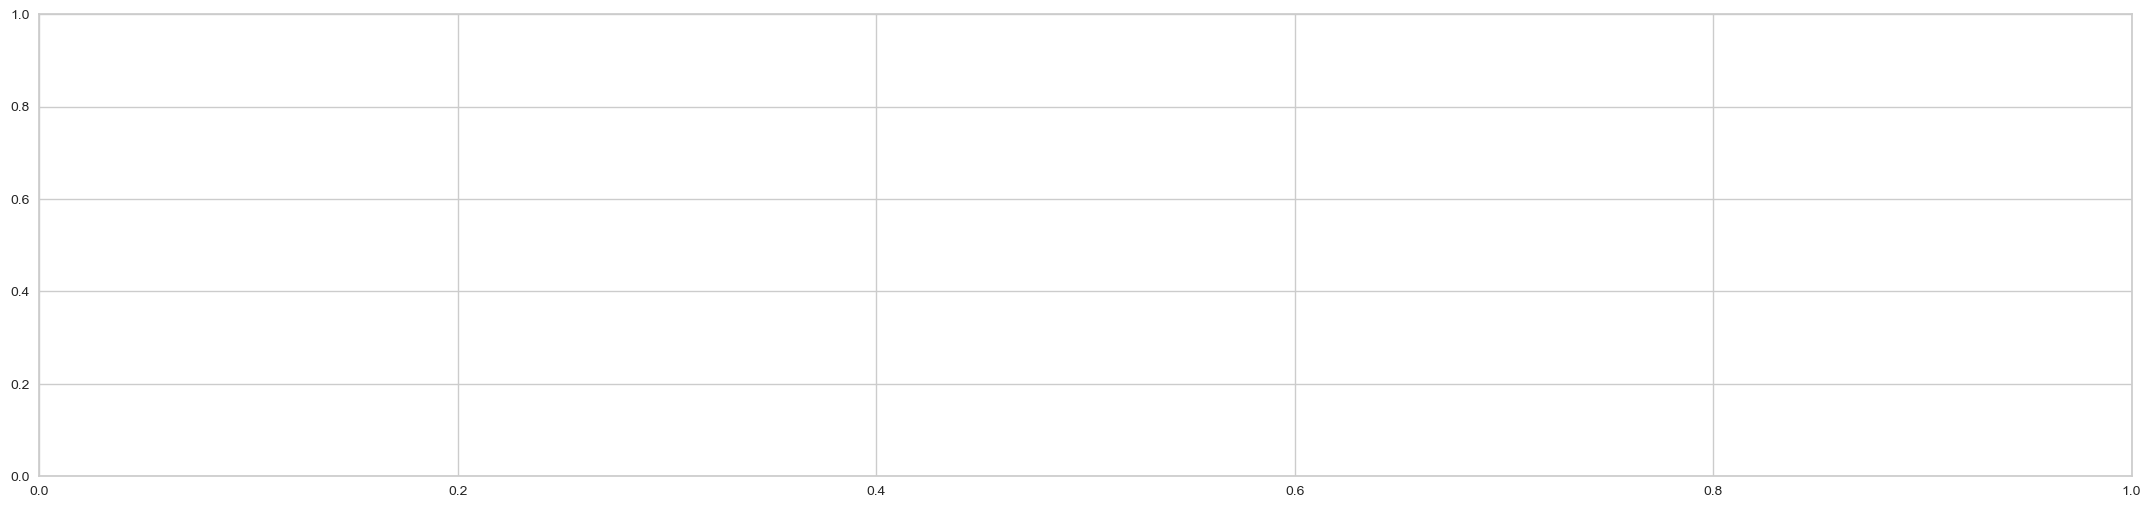

In [28]:
evaluate_model(final_gbr)

## 에측할때는 새로운 데이터로 처리

In [29]:
# predict_model(final_gbr)

In [30]:
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,121319.788517
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,164794.561713
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,176943.475406
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,181234.184085
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,198957.511198


## 예측 결과 확인하기 

In [32]:
test.shape

(1459, 80)

In [33]:
unseen_predictions.shape

(1459, 81)

In [34]:
unseen_predictions['prediction_label'].head()

0    121319.788517
1    164794.561713
2    176943.475406
3    181234.184085
4    198957.511198
Name: prediction_label, dtype: float64

In [35]:
y_test.shape

(1459, 2)

In [36]:
y_test.columns

Index(['Id', 'SalePrice'], dtype='object')

In [37]:
(y_test['SalePrice'] > unseen_predictions['prediction_label']).sum()

896

In [38]:
(y_test['SalePrice'] < unseen_predictions['prediction_label']).sum()

563

## 모델 저장하기 

In [39]:
save_model(final_gbr,'Final GBR Model 7Jul2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/h4/44486vyn1_xbs13g1z50l5m00000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'G...
                                                                     'RoofMatl',
                                                                     'MasVnrType',
                                                                     'ExterQual',
                               